In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import networkx as nx

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import sys
sys.path.append('../scripts/')
from habitat import Habitat
from stepping_stone import SteppingStone

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
sns.set_style('white')
plt.style.use('bmh')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = 8, 6

In [5]:
def asymetric_uniform_migration(self):
    for i,j in self.g.edges():
        if i < j:
            self.g[i][j]['m'] = .3
        else:
            self.g[i][j]['m'] = 0.0
    
    self.m = nx.adjacency_matrix(self.g, weight='m')
    self.m = self.m.toarray()

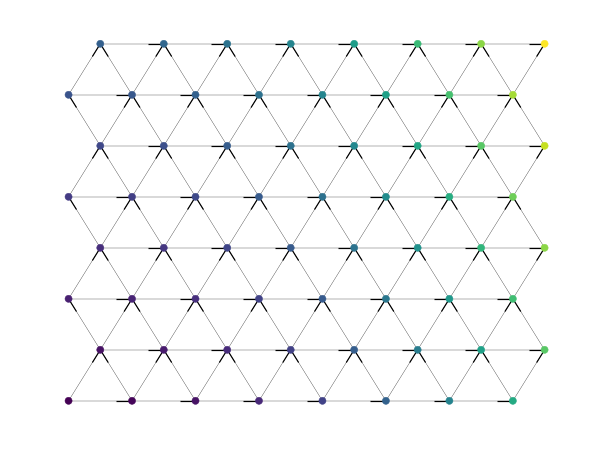

In [6]:
h = Habitat(8, 8)
h.mig_rate_func = asymetric_uniform_migration
h.mig_rate_func(h)
h.plot_graph(50, 1)

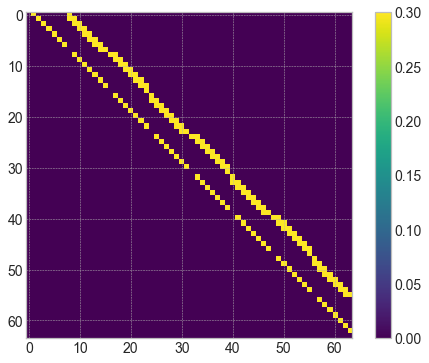

In [7]:
h.plot_mig_mat()

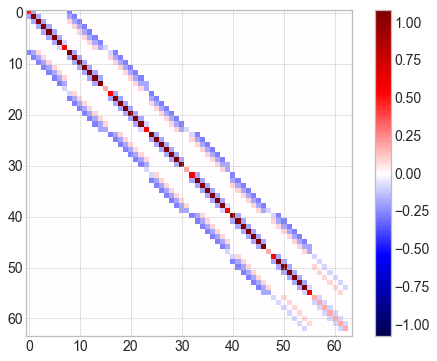

In [8]:
h.compute_graph_laplacian()
h.compute_distances()
h.plot_lapl(h.llt)

In [9]:
s = SteppingStone(h, '../output/y_asym_unif_stepping_stone.pkl')

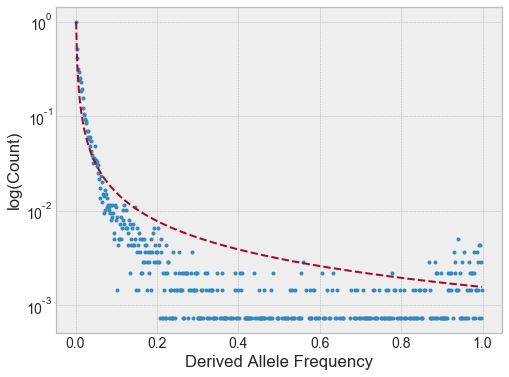

In [10]:
s.plot_sfs()

In [11]:
s.filter_rare_var(.05)

In [12]:
print(s.y.shape)

(640, 1620)


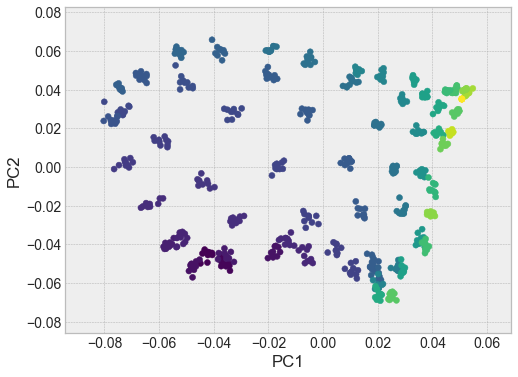

In [28]:
s.plot_pca()

In [52]:
s.compute_distances()

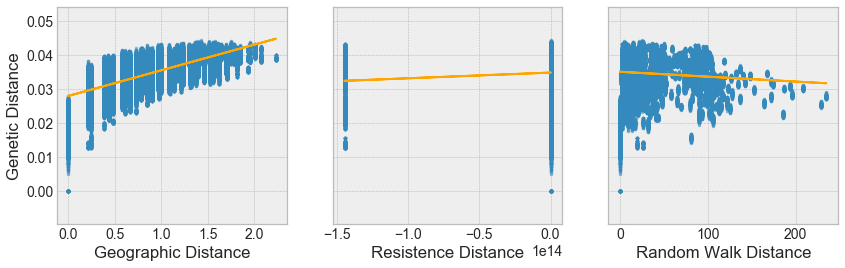

In [60]:
s.plot_distances()